In [48]:
#Import necessary librabries
import math
import pandas as pd
import numpy as np
import pandas_datareader as web
import datetime
from sklearn.preprocessing import  MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
import matplotlib.pyplot as plt
plt.style.use('bmh')

In [49]:
#Load Data from Drive
df = pd.read_csv('/content/drive/MyDrive/StockPricePrediction/FB.csv', index_col='Date', parse_dates=True)
company = 'FACEBOOK'

In [50]:
#Check if any null values are present
df.isna().any()

Open         False
High         False
Low          False
Close        False
Adj Close    False
Volume       False
dtype: bool

In [51]:
#Description of loaded Dataset 
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2078 entries, 2012-05-18 to 2020-08-20
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       2078 non-null   float64
 1   High       2078 non-null   float64
 2   Low        2078 non-null   float64
 3   Close      2078 non-null   float64
 4   Adj Close  2078 non-null   float64
 5   Volume     2078 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 113.6 KB


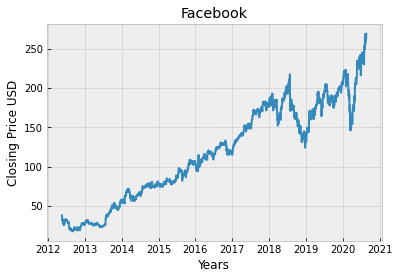

In [69]:
#Data Visulization of Closing price of Facebook Stock since the year 2012 till 2021
plt.title('Facebook')
plt.xlabel('Years')
plt.ylabel('Closing Price USD')
plt.plot(df['Close'])
plt.show()

In [53]:
training_set = df['Close']
training_set = pd.DataFrame(training_set)

In [54]:
#Data Preprocessing i.e scaling the data in the range of 0 to 1
sc = MinMaxScaler(feature_range=(0,1))
training_set_scaled = sc.fit_transform(training_set.values.reshape(-1,1))

In [55]:
training_set.shape

(2078, 1)

In [56]:
#Number of days to take into consideration for predicting the next price
prediction_days = 20

In [57]:
X_train = []
y_train = []
for i in range(prediction_days, len(training_set_scaled)):
  X_train.append(training_set_scaled[i-prediction_days:i, 0])
  y_train.append(training_set_scaled[i, 0])


X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))


In [58]:
X_train

array([[[0.0815823 ],
        [0.06486787],
        [0.05280961],
        ...,
        [0.03796561],
        [0.04202484],
        [0.04886978]],

       [[0.06486787],
        [0.05280961],
        [0.05678924],
        ...,
        [0.04202484],
        [0.04886978],
        [0.05444126]],

       [[0.05280961],
        [0.05678924],
        [0.06088825],
        ...,
        [0.04886978],
        [0.05444126],
        [0.05643107]],

       ...,

       [[0.89151541],
        [0.88403369],
        [0.85510187],
        ...,
        [0.96931701],
        [0.96907824],
        [0.96875993]],

       [[0.88403369],
        [0.85510187],
        [0.84758038],
        ...,
        [0.96907824],
        [0.96875993],
        [0.97345585]],

       [[0.85510187],
        [0.84758038],
        [0.85868351],
        ...,
        [0.96875993],
        [0.97345585],
        [0.97445076]]])

In [59]:
#Building the model with LSTM, Dropout layers and one Dense layer at the end
model = Sequential()

model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=50))
model.add(Dropout(0.2))

model.add(Dense(units=1))



In [60]:
#Compile the model with Adam Optimizer and loss function Mean Squared Error
model.compile(optimizer='adam', loss='mean_squared_error')


#Train the model by passing the input with 100 epochs and batch size 32
model.fit(X_train, y_train, epochs=100, batch_size=32)

Epoch 1/100
65/65 [==============================] - 8s 39ms/step - loss: 0.0168
Epoch 2/100
65/65 [==============================] - 3s 39ms/step - loss: 0.0035
Epoch 3/100
65/65 [==============================] - 3s 39ms/step - loss: 0.0033
Epoch 4/100
65/65 [==============================] - 3s 39ms/step - loss: 0.0026
Epoch 5/100
65/65 [==============================] - 3s 39ms/step - loss: 0.0029
Epoch 6/100
65/65 [==============================] - 3s 39ms/step - loss: 0.0030
Epoch 7/100
65/65 [==============================] - 3s 39ms/step - loss: 0.0030
Epoch 8/100
65/65 [==============================] - 3s 39ms/step - loss: 0.0025
Epoch 9/100
65/65 [==============================] - 3s 41ms/step - loss: 0.0023
Epoch 10/100
65/65 [==============================] - 3s 40ms/step - loss: 0.0022
Epoch 11/100
65/65 [==============================] - 3s 39ms/step - loss: 0.0022
Epoch 12/100
65/65 [==============================] - 3s 39ms/step - loss: 0.0024
Epoch 13/100
65/65 [=====

In [61]:
X_train.shape

(2058, 20, 1)

In [62]:
#Loading Test Data from the year 2021 till now
test_data = pd.read_csv('/content/drive/MyDrive/StockPricePrediction/FB_test.csv')
actual_prices = test_data['Close'].values

total_dataset = pd.concat((df['Close'], test_data['Close']), axis=0)


model_inputs = total_dataset[len(total_dataset) - len(test_data) - prediction_days:].values
model_inputs = model_inputs.reshape(-1, 1)
model_inputs = sc.transform(model_inputs)



In [63]:
#Preprocessing of test data imported
x_test = []

for x in range(prediction_days, len(model_inputs)):
  x_test.append(model_inputs[x-prediction_days:x, 0])

x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

#Predicting the prices from using the trained model
predicted_prices = model.predict(x_test)
predicted_prices = sc.inverse_transform(predicted_prices)

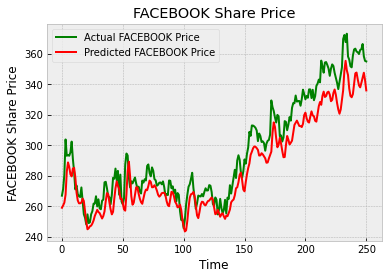

In [64]:
#Graphical Representation of actual and predicted prices of the stock
plt.plot(actual_prices, color='green', label=f"Actual {company} Price")
plt.plot(predicted_prices, color='red', label=f"Predicted {company} Price")
plt.title(f"{company} Share Price")
plt.xlabel('Time')
plt.ylabel(f"{company} Share Price")
plt.legend()
plt.show()

In [67]:
#Predicting price value of Next Day
real_data = [model_inputs[len(model_inputs) + 1 - prediction_days:len(model_inputs+1), 0]]
real_data = np.array(real_data)
real_data.shape
real_data = np.reshape(real_data, (real_data.shape[0], real_data.shape[1], 1))

prediction = model.predict(real_data)
prediction = sc.inverse_transform(prediction)
print("Prediction:",prediction)

Prediction: [[333.2414]]


Right now the price of Facebook stocks is 359.37 USD, which is nearby to the amount which we predicted.